# 各channel平均firing rate(依陣列方式排列)

session: 1
Dataset : /home/jovyan/dataset/indy/Sorted_Spike_Dataset/indy_20160407_02.mat
lost [32. 47. 78. 79. 82. 84.]


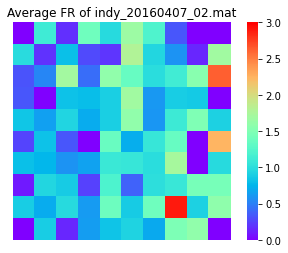

In [11]:
import h5py
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
from os import listdir
import seaborn as sns

dataset_path = '/home/jovyan/dataset/indy/Sorted_Spike_Dataset/'

if os.path.isdir(dataset_path) != True:
    print('\n>> Not find dataset folder path: '+dataset_path)
    print('>> Please Check folder_path && Computer working system !\n')

session = []
for i in range(37):
    session.append(i+1)
    
List_File = listdir(dataset_path)
List_File.sort()
session_avg = []
Channel_List = []
channel_arr = []
channel_arr.append(['N', 42, 46, 25, 31, 35, 39, 41, 47, 'N'])
channel_arr.append([ 38, 40, 48, 27, 29, 33, 37, 43,  6, 45])
channel_arr.append([ 34, 36, 44,  1,  9, 13, 17, 21,  2, 88])
channel_arr.append([ 30, 32, 89, 93,  5, 15, 19, 23,  8, 84])
channel_arr.append([ 26, 28, 81, 85, 87, 91,  7,  4, 86, 80])
channel_arr.append([ 22, 24, 77, 79, 83,  3, 11, 66, 82, 76])
channel_arr.append([ 18, 20, 73, 75, 95, 54, 62, 74, 78, 72])
channel_arr.append([ 14, 16, 94, 96, 57, 58, 50, 70, 64, 68])
channel_arr.append([ 10, 12, 90, 92, 61, 65, 69, 71, 56, 60])
channel_arr.append(['N', 51, 49, 53, 55, 59, 63, 67, 52,'N' ])
for i in range(10):
    for j in range(10):
        Channel_List.append(channel_arr[i][j])
channel = Channel_List

def Get_Spike_Firring(firring_point, bins):
    spike_data = []
    time_last_point = bins[-1]
    for i in firring_point:
        if i < time_last_point:
            spike_data.append(i)
    mapping_data = np.digitize(spike_data, bins)
    map_data, bin_arr = np.histogram(spike_data, bins=bins)
    return map_data.reshape(-1, len(map_data))

# 選session
select_session = 0
print('session: '+str(select_session+1))
bin_width = 16
file_name = List_File[select_session]
print('Dataset :',dataset_path+str(file_name))
mat_file = h5py.File(dataset_path+str(file_name), 'r') # read mat file
CHANNELS = mat_file[list(mat_file.keys())[1]] # electric channel Info
CURSOR_POS = mat_file[list(mat_file.keys())[2]] # cursor position
FINGER_POS = mat_file[list(mat_file.keys())[3]] # finger position
SPIKES = mat_file[list(mat_file.keys())[4]] # Spike firing time point 這邊是紀錄發生spike的時間點,所以根據bins寬度,要另外整理
Session_Unit = SPIKES.shape[0] # session unit count ,此一session有幾個被sorting的unit 第一筆皆為hash
TIMES = mat_file[list(mat_file.keys())[5]] # session t 0.004=4ms
time_bin = (TIMES[0])[::bin_width]
WF = mat_file[list(mat_file.keys())[7]]

# get firing rate
search_index = 0
for ch_index in channel:
    '''
    If use channel count 100 , the channel list has 'N'
    ch_index-1 : because setting channel number start is 1 ,but program is start 0
    '''
    # concat data by channel
    fr_unit_hash = []
    fr_unit_01 = []
    fr_unit_02 = []
    fr_unit_03 = []
    fr_unit_04 = []

    if str(ch_index) != 'N':

        unit_hash = mat_file[SPIKES[0][ch_index-1]] 
        unit_01 = mat_file[SPIKES[1][ch_index-1]]
        unit_02 = mat_file[SPIKES[2][ch_index-1]]

        # unit.shape[0] == 2 ,.mat file show this is null array>>表示 .mat檔對應的是空集合的channel
        if unit_hash.shape[0] != 2 :
            fr_unit_hash = Get_Spike_Firring(unit_hash[0], time_bin)
        else:
            fr_unit_hash = np.zeros([1,time_bin.shape[0]-1])

        if unit_01.shape[0] != 2 :
            fr_unit_01 = Get_Spike_Firring(unit_01[0], time_bin)
        else:
            fr_unit_01 = np.zeros([1,time_bin.shape[0]-1]) 

        if unit_02.shape[0] !=2 :    
            fr_unit_02 = Get_Spike_Firring(unit_02[0], time_bin)
        else:
            fr_unit_02 = np.zeros([1,time_bin.shape[0]-1])

        if Session_Unit == 5:
            unit_03 = mat_file[SPIKES[3][ch_index-1]]
            unit_04 = mat_file[SPIKES[4][ch_index-1]]
            if unit_03.shape[0] !=2 : 
                fr_unit_03 = Get_Spike_Firring(unit_03[0], time_bin)
            else:
                fr_unit_03 = np.zeros([1,time_bin.shape[0]-1])

            if unit_04.shape[0] !=2 :
                fr_unit_04 = Get_Spike_Firring(unit_04[0], time_bin)
            else:
                fr_unit_04 = np.zeros([1,time_bin.shape[0]-1])
        else:
            fr_unit_03 = np.zeros([1,time_bin.shape[0]-1])
            fr_unit_04 = np.zeros([1,time_bin.shape[0]-1])

    else:
        fr_unit_hash = np.zeros([1,time_bin.shape[0]-1])
        fr_unit_01 = np.zeros([1,time_bin.shape[0]-1])
        fr_unit_02 = np.zeros([1,time_bin.shape[0]-1])
        fr_unit_03 = np.zeros([1,time_bin.shape[0]-1])
        fr_unit_04 = np.zeros([1,time_bin.shape[0]-1])

    # concate unit data
    if search_index == 0:
        Firing_rate_hash = fr_unit_hash
        Firing_rate_unit_1 = fr_unit_01
        Firing_rate_unit_2 = fr_unit_02
        Firing_rate_unit_3 = fr_unit_03
        Firing_rate_unit_4 = fr_unit_04
    else:
        Firing_rate_hash = np.concatenate((Firing_rate_hash, fr_unit_hash), axis=0)
        Firing_rate_unit_1 = np.concatenate((Firing_rate_unit_1, fr_unit_01), axis=0)
        Firing_rate_unit_2 = np.concatenate((Firing_rate_unit_2, fr_unit_02), axis=0)
        Firing_rate_unit_3 = np.concatenate((Firing_rate_unit_3, fr_unit_03), axis=0)
        Firing_rate_unit_4 = np.concatenate((Firing_rate_unit_4, fr_unit_04), axis=0)
    search_index +=1

# print('=====',np.all(Firing_rate_unit_4 == 0))
Unsort_data = Firing_rate_hash+ Firing_rate_unit_1+ Firing_rate_unit_2+ Firing_rate_unit_3 +Firing_rate_unit_4

avg_fr_channel = np.mean(Unsort_data, 1)
avg_fr = np.reshape(avg_fr_channel, (10, 10))


exist = np.where(avg_fr_channel!=0)[0]
exist = exist+1
exist_e = np.zeros([len(exist)])
e_index = 0
for i in exist:
    exist_e[e_index] = channel[i-1]
exist_e.sort()


lost = np.where(avg_fr_channel==0)[0]
lost = lost+1
lost_e = np.zeros([len(lost)-4])
e_index = 0
for i in lost:
    if i!=1 and i!=10 and i!=91 and i!=100:
        lost_e[e_index] = channel[i-1]
        e_index += 1
lost_e.sort()
print('lost', lost_e)

ax = sns.heatmap(avg_fr, vmin=0, vmax=3, square=True, xticklabels=False, yticklabels=False, cmap='rainbow')
ax.set_title('Average FR of '+str(file_name))
fig = plt.gcf()

In [ ]:
%reset
